# Monthly Payment Project

## Car of Choice

The target car of this project is the Volkswagen e-Golf, an electric hatchback with an MSRP of \$30495 from [its official website](http://www.vw.com/models/e-golf/section/masthead/).

## Loan Details

This project uses Auto Loan Rates from [Bank of America](https://www.bankofamerica.com/auto-loans/auto-loan-rates/), which offers an APR of 3.09% for new cars from the dealer.

## Programmatic Graphing Preparation

Tables and graphs in this project are dynamically generated with Python 3. The following code defines the function that generates these visualizations.

In [1]:
from IPython.display import HTML, display
import tabulate
import matplotlib.pyplot as plt

def show(func, domain, xlabel, ylabel):
    table = [[xlabel, ylabel]]

    for p in domain:
        table.append([p, func(p)])

    display(HTML(tabulate.tabulate(table, tablefmt='html')))

    plt.plot(list(map(lambda t: t[0], table[1:])), list(map(lambda t: t[1], table[1:])))

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

def add_line(func, domain, linetype, label):
    plt.plot(domain, list(map(func, domain)), linetype, label=label)

def show_multiple(xlabel, ylabel):
    plt.legend(loc='best')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Problem 1

It is known from the curriculum that the remaining balance function $b(x)$ where $x$ is the number of months passed with APR $r$ (compounded monthly), initial balance $i$ and monthly payment $p$ is defined as follows:

$$b(x)=
\begin{cases}
    i & x=0 \\
    b(x-1)\cdot(1+\dfrac{r}{12})-p & x\gt0
\end{cases}$$

The compounding process can be reversed to determine the loan amount based on the total number of months taken ($x$) and the monthly payment ($p$). It is represented with the following form, with the APR from Bank of America substituting $r$:

$$l(x,p)=
\begin{cases}
    0 & x=0 \\
    \dfrac{l(x-1,p)+p}{1+\frac{0.0309}{12}} & x\gt0
\end{cases}$$

The following Python 3 code generates the table and the graph for the piecewise function above:

Monthly Payment,Cost of Car
200,6867.922007731467
210,7211.318108118041
220,7554.714208504613
230,7898.110308891187
240,8241.506409277761
250,8584.902509664335
260,8928.298610050912
270,9271.694710437485
280,9615.090810824056
290,9958.486911210628


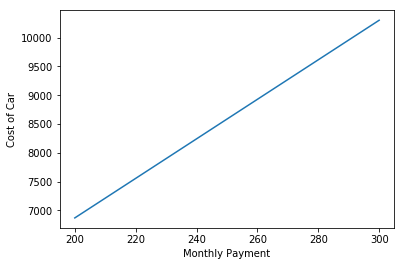

In [2]:
def l(x, p):
    if x == 0:
        return 0
    else:
        return (l(x-1, p) + p)/(1 + 0.0309/12)

show(lambda x: l(36, x), range(200, 310, 10), 'Monthly Payment', 'Cost of Car')

Judging by the graph, it appears that this function is linear.

The slope of the line can be determined using the slope formula: $\dfrac{y_2-y_1}{x_2-x_1}$. 2 rows from the table are used to substitute $x_1, y_1$ and $x_2, y_2$:

$$\dfrac{10301.883011597203-6867.922007731467}{300-200}=\dfrac{3433.9610038657365}{100}=34.339610038657365$$

When the monthly payment is \\$0, the loan (cost of car) is also \\$0. Therefore, the $y$-intercept of this function is 0.

In [3]:
l(36, 0)

0.0

With this function's slope and $y$-intercept known, it can be expressed in a slope-intercept equation: $$y=34.339610038657365x$$
The table and graph for this equation with the same $x$ values as before are generated below as $l_1(x)$:

Monthly Payment,Cost of Car
200,6867.922007731472
210,7211.318108118046
220,7554.71420850462
230,7898.110308891193
240,8241.506409277767
250,8584.90250966434
260,8928.298610050913
270,9271.694710437489
280,9615.090810824062
290,9958.486911210635


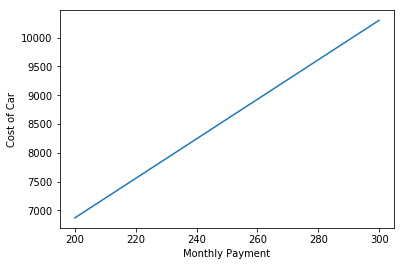

In [4]:
def l_1(x):
    return 34.339610038657365*x

show(l_1, range(200, 310, 10), 'Monthly Payment', 'Cost of Car')

Aside from minor degradations of precision, the two tables and graphs are equivalent.

Problem 1 requires a verification of the linear equation with a monthly payment of \\$360 as the input. It is shown below that the outputs of both equations are equal when \\$360 is given.

In [5]:
(l(36, 360), l_1(360))

(12362.259613916647, 12362.25961391665)

In summary, the monthly payment is directly proportional to the loan amount (i.e. cost of car).

# Problem 2

[This website](http://www.financeformulas.net/Loan_Payment_Formula.html) defines the monthly payment formula as follows, where $P$ is the monthly payment, $V$ is the loan amount, $r$ is the rate per period, and $n$ is the number of periods:

$$P=\dfrac{rV}{1-(1+r)^{-n}}$$

However, this formula results in $P=0$ whenever $r=0$, which does not accurately model the situation when the interest rate is 0. Instead, this case should be injected to form the following function, using the price of the e-Golf from its website (\$30495) and the number of payments from the problem (36):

$$P(r)=\begin{cases}
    \dfrac{30495}{36} & r=0 \\
    \dfrac{30495r}{1-(1+r)^{-36}} & r\gt0
\end{cases}$$

Since the domain consists of APRs, the input must be converted to the rate per period inside the function, resulting in the following:

$$P(r)=\begin{cases}
    \dfrac{30495}{36} & r=0 \\
    \dfrac{30495(r\div100\div12)}{1-(1+r\div100\div12)^{-36}} & (r\div100\div12)\gt0
\end{cases}$$

This function is expressed in Python below. Its table and graph are shown thereafter:

Interest Rate (%),Monthly Payment
0,847.0833333333334
1,860.2059895632888
2,873.4554384462384
3,886.8314876867606
4,900.3339227836788
5,913.9625072067765
6,927.7169825851912
7,941.5970689095142
8,955.6024647463423
9,969.7328474648841


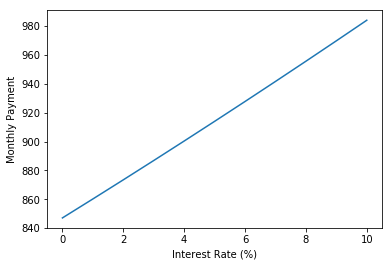

In [6]:
def P(r):
    if r == 0:
        return 30495/36
    else:
        return (30495*(r/100/12))/(1-(1+r/100/12)**(-36))
    
show(P, range(0, 11), 'Interest Rate (%)', 'Monthly Payment')

When the interest rate is 13%, the monthly payment is...

In [7]:
P(13)

1027.497066340389

Judging by the graph, this function also appears to be linear, except with a slight curve. Since $P(0)=847.083333\dots$, this value is the function's $y$-intercept. Its slope is determined to be $\dfrac{y_2-y_1}{x_2-x_1}=\dfrac{P(10)-P(0)}{10-0}$, which is evaluated below:

In [8]:
(P(10) - P(0))/10

13.690454014274394

Applying the slope and the $y$-intercept to the $y$-intercept form yields the following function:

$$P_1(x)=13.690454014274394x+847.083333\dots$$

The table and graph for this function is shown below, with the slope and the $y$-intercept represented by actual values instead of truncated decimal representations:

Interest Rate (%),Monthly Payment
0,847.0833333333334
1,860.7737873476078
2,874.4642413618822
3,888.1546953761565
4,901.845149390431
5,915.5356034047054
6,929.2260574189797
7,942.9165114332541
8,956.6069654475285
9,970.297419461803


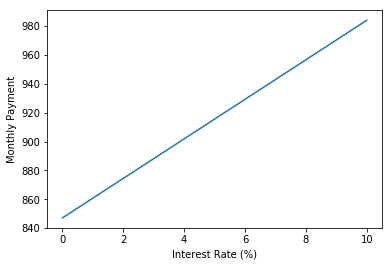

In [9]:
slope = (P(10) - P(0))/10
y_intercept = P(0)

def P_1(x):
    return slope*x + y_intercept

show(P_1, range(0, 11), 'Interest Rate (%)', 'Monthly Payment')

The outputs from the actual function between 1 and 10 appear to drop slightly below the outputs from the model function. In fact, the actual function is shown to be nonlinear when both lines are shown on a single graph with an expanded domain:

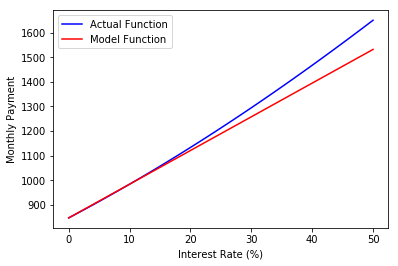

In [10]:
domain = list(range(0, 51))
range_act = list(map(P, domain))
range_mdl = list(map(P_1, domain))

add_line(P, domain, 'b-', 'Actual Function')
add_line(P_1, domain, 'r-', 'Model Function')
show_multiple('Interest Rate (%)', 'Monthly Payment')

To achieve a more accurate model of the actual function, 2 columns of differences are appended to the table of outputs from the actual function, and the strategy discovered in class is used to determine the quadratic parameters:

| Interest Rate (%) | Monthly Payment   | $\Delta^1$         | $\Delta^2$          |
|------------------:|-------------------|--------------------|---------------------|
| 0	                | 847.0833333333334 | 13.122656229955396 | 0.12679265299425424 |
| 1                 | 860.2059895632888 | 13.24944888294965  | -                   |
| 2                 | 873.4554384462384 | -                  | -                   |


$$y=0.06339632649712712x^2+13.059259903458269x+847.0833333333334$$

This function is then inserted into the graph above to produce the following:

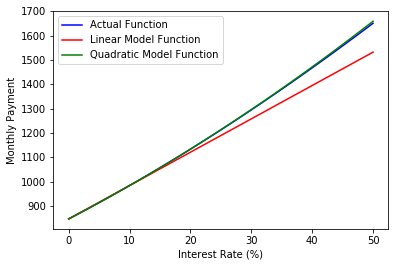

In [11]:
quadmdl = lambda x: 0.06339632649712712*x**2+13.059259903458269*x+847.0833333333334
range_quadmdl = list(map(quadmdl, domain))

add_line(P, domain, 'b-', 'Actual Function')
add_line(P_1, domain, 'r-', 'Linear Model Function')
add_line(quadmdl, domain, 'g-', 'Quadratic Model Function')
show_multiple('Interest Rate (%)', 'Monthly Payment')

This quadratic model is not completely accurate, since the verification below shows a very slight difference between it and the actual function:

In [12]:
(quadmdl(13), P(13))

(1027.5676912563054, 1027.497066340389)

In summary, there is a (somewhat) quadratic relationship between the interest rate and the monthly payment, given that the total loan amount and the number of months stay constant.

# Problem 3

The formula developed in Problem 2 can be reused for this problem, so it is shown below. $P$ is the monthly payment, $r$ is the rate per period, and $n$ is the number of periods:

$$P=\begin{cases}
    \dfrac{30495}{36} & r=0 \\
    \dfrac{30495r}{1-(1+r)^{-n}} & r\gt0
\end{cases}$$

This formula is then arranged for problem 3, whose function accepts the loan's term (number of periods) as input and produces the monthly payment as output, with $r$ set to Bank of America's APR (which eliminates the first branch of the piecewise function):

$$P(n)=\dfrac{30495\dot(3.09\div100\div12)}{1-(1+3.09\div100\div12)^{-n}}$$

Its table and graph are generated below:

Term (months),Monthly Payment
24,1311.9263974066362
28,1130.2422347915344
32,993.9959324961272
36,888.0415347078996
40,803.2914676551168
44,733.962729588452
48,676.1999857718238
52,627.3341580928538
56,585.4587619831559


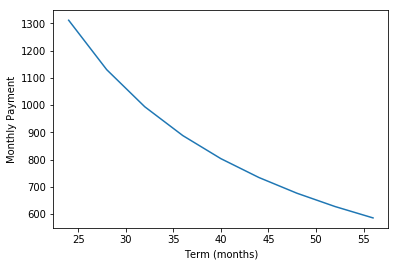

In [13]:
def P3(n):
    return (30495 * 3.09/100/12) / (1 - (1 + 3.09/100/12)**(-n))

domain = range(24, 60, 4)

show(P3, domain, 'Term (months)', 'Monthly Payment')

When the term of the loan is 5 years ($5\times12=60$ months), the monthly payment is:

In [14]:
P3(60)

549.1757085705119

Various methods of regression are used with data from the table above, resulting in the following potential models:

$$\text{Exponential: } f(x) = 2245.368917\times0.9754944379^x$$
$$\text{Quadratic: } f(x) = 0.5700994332x^2-67.29239412x+2579.887532$$
$$\text{Quartic: } f(x) = (3.86320017\times10^{-4})x^4-0.0767104306x^3+5.964051965x^2-226.7283792x+4249.966905$$
$$\text{Power Curve: } f(x) = 26983.05097x^{-0.9522076238}$$

All potential models listed above are graphed below with an expanded domain. The actual function is included for visual comparison:

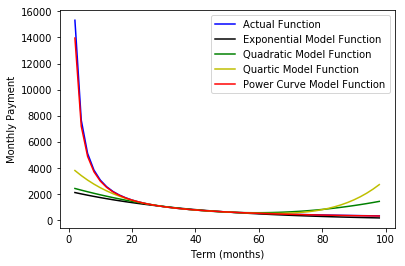

In [15]:
domain = range(2, 100, 2)

exp_mdl = lambda x: 2245.368917*0.9754944379**x
quad_mdl = lambda x: 0.5700994332*x**2-67.29239412*x+2579.887532
quart_mdl = lambda x: 3.86320017e-4*x**4-0.0767104306*x**3+5.964051965*x**2-226.7283792*x+4249.966905
power_mdl = lambda x: 26983.05097*x**(-0.9522076238)

add_line(P3, domain, 'b-', 'Actual Function')
add_line(exp_mdl, domain, 'k-', 'Exponential Model Function')
add_line(quad_mdl, domain, 'g-', 'Quadratic Model Function')
add_line(quart_mdl, domain, 'y-', 'Quartic Model Function')
add_line(power_mdl, domain, 'r-', 'Power Curve Model Function')
show_multiple('Term (months)', 'Monthly Payment')

It is clear that the Power Curve best models the actual function, with both lines overlapping throughout the graph.

Quantitative verification of the model against the actual function is performed below. The monthly payment for a term of 5 years ($5\times12=60$ months) is determined using both functions (model first, actual second):

In [16]:
(power_mdl(60), P3(60))

(546.9175716638358, 549.1757085705119)

In conclusion, the [power law](http://en.wikipedia.org/wiki/Power_law) appears to apply to the monthly payment in relation to the loan's term, given that the loan amount and the interest rate remain constant.